In [38]:
# Week 3–4: Correlation Analysis and Initial Modeling

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd

In [3]:
sns.set_palette("Set2")
sns.set_context("notebook")

In [4]:
df = pd.read_csv("../data/cleaned_data_week1_2.csv")

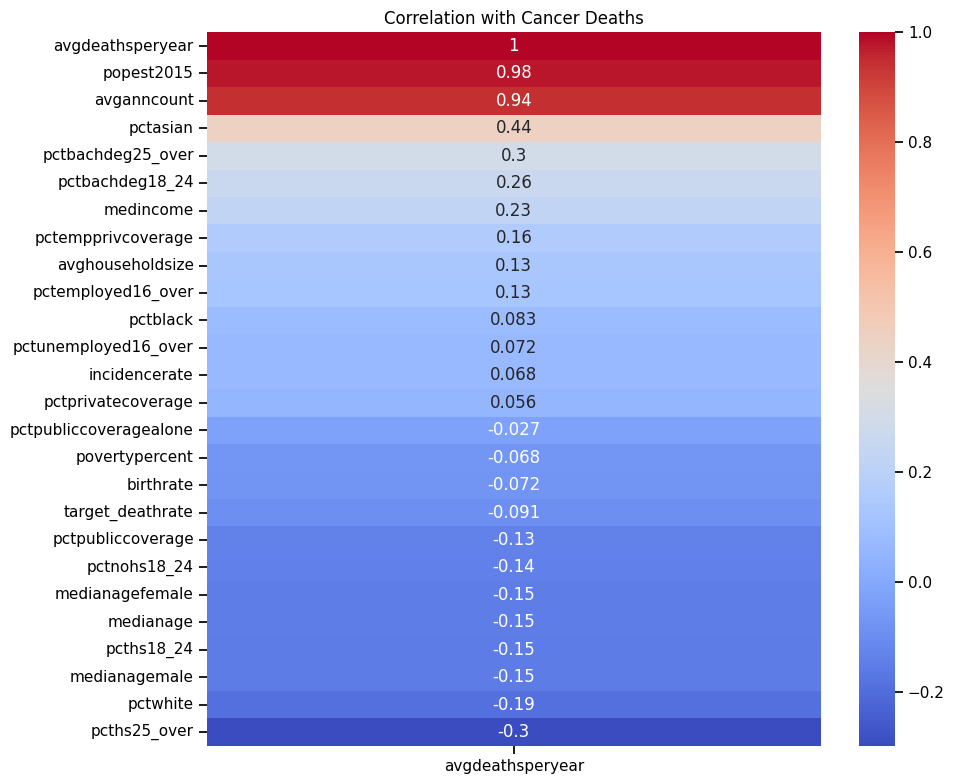

In [5]:
# 1. Correlation with Target Variables

plt.figure(figsize=(10, 8))
corr = df.corr(numeric_only=True)
sns.heatmap(corr[['avgdeathsperyear']].sort_values(by='avgdeathsperyear', ascending=False), 
            annot=True, cmap='coolwarm')
plt.title("Correlation with Cancer Deaths")
plt.tight_layout()
plt.show()

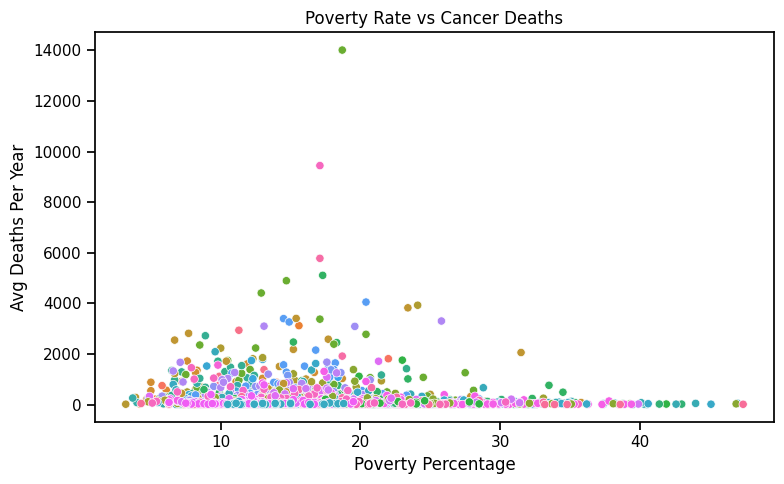

In [ ]:
# 2. Poverty vs Deaths

plt.figure(figsize=(8, 5))
sns.scatterplot(x='povertypercent', y='avgdeathsperyear', hue='state', data=df, legend=False)
plt.title("Poverty Rate vs Cancer Deaths")
plt.xlabel("Poverty Percentage")
plt.ylabel("Avg Deaths Per Year")
plt.tight_layout()
plt.show()

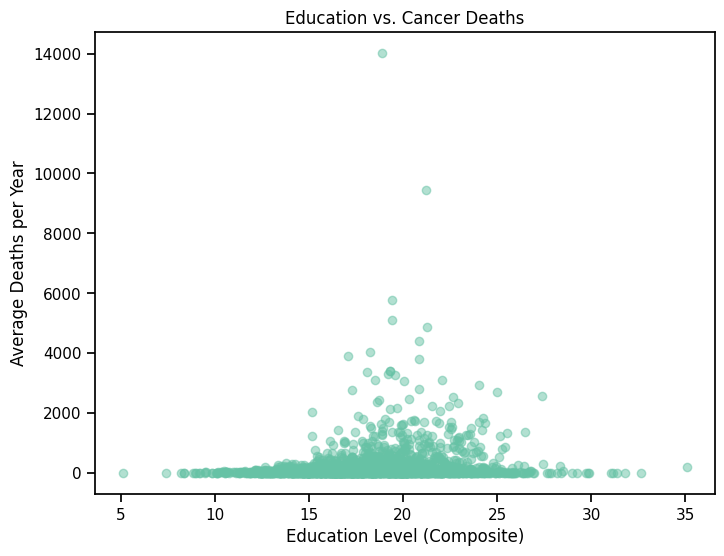

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# read cleaned data
merged_df = pd.read_csv('../data/cleaned_data_week1_2.csv')

education = (
    merged_df['pcths18_24'] +
    merged_df['pctbachdeg18_24'] +
    merged_df['pctbachdeg25_over']
) / 3



# plotting
plt.figure(figsize=(8,6))
plt.scatter(education, merged_df['avgdeathsperyear'], alpha=0.5)
plt.xlabel('Education Level (Composite)')
plt.ylabel('Average Deaths per Year')
plt.title('Education vs. Cancer Deaths')
plt.savefig('../plots/education_vs_deaths.png')
plt.show()


In [8]:
# 3. Education vs Deaths (Grouped by Region)
df['region'] = df['state'].map({
    'California': 'West', 'Nevada': 'West', 'Texas': 'South', 'New York': 'Northeast',
    'Florida': 'South', 'Illinois': 'Midwest', 'Georgia': 'South', 'Ohio': 'Midwest',
    # Expand if needed
})


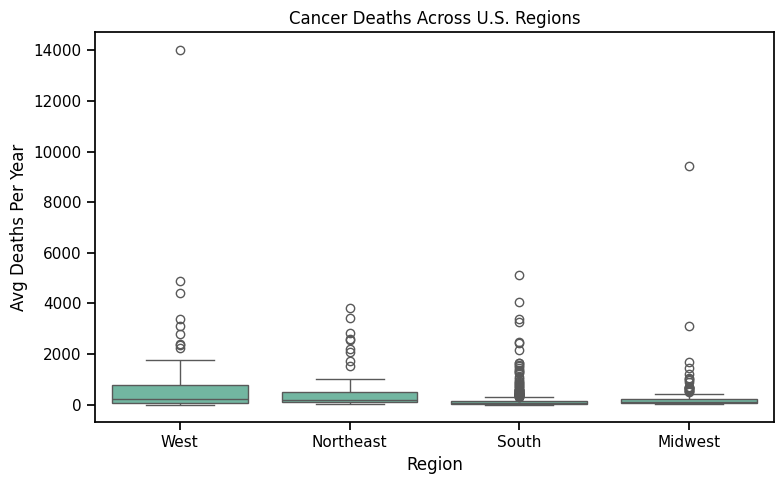

In [9]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='region', y='avgdeathsperyear', data=df)
plt.title("Cancer Deaths Across U.S. Regions")
plt.xlabel("Region")
plt.ylabel("Avg Deaths Per Year")
plt.tight_layout()
plt.show()

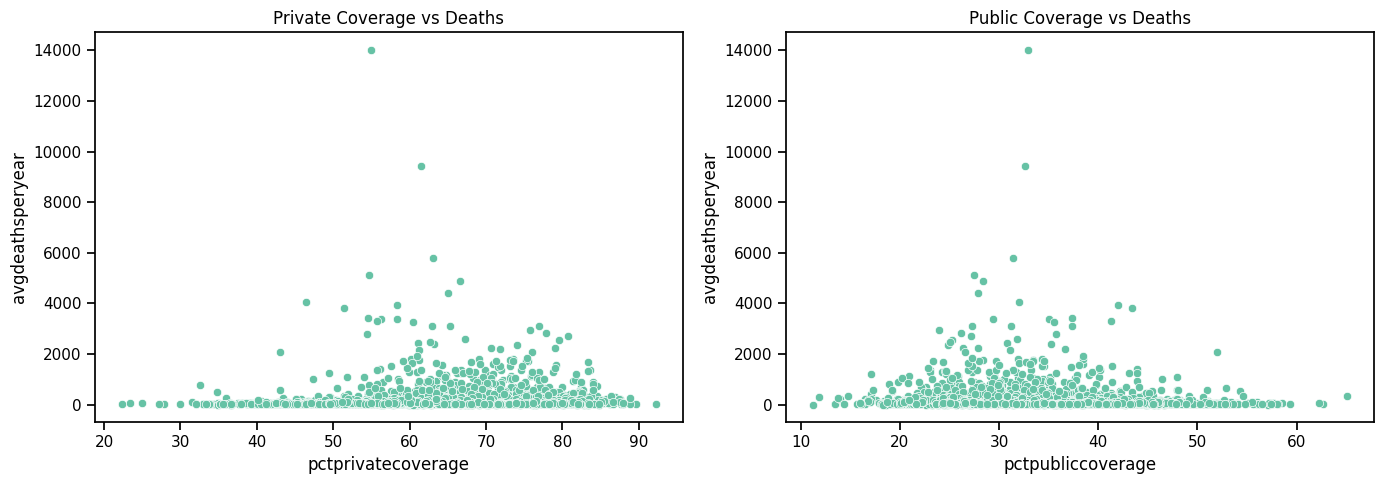

In [10]:
# 4. Insurance Type vs Deaths
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
sns.scatterplot(x='pctprivatecoverage', y='avgdeathsperyear', data=df, ax=axes[0])
axes[0].set_title("Private Coverage vs Deaths")
sns.scatterplot(x='pctpubliccoverage', y='avgdeathsperyear', data=df, ax=axes[1])
axes[1].set_title("Public Coverage vs Deaths")
plt.tight_layout()
plt.show()


In [11]:
# 5. Cancer Death Rate Map (by State)
df['num_death'] = df['avgdeathsperyear'] * df['popest2015'] / 100000
state_df = df.groupby('state')[['num_death', 'popest2015']].sum().reset_index()
state_df['death_rate'] = (state_df['num_death'] / state_df['popest2015']) * 100000


In [12]:
import os
import zipfile
import requests

# Create folder
os.makedirs("shapefile", exist_ok=True)

# Download URL
url = "https://www2.census.gov/geo/tiger/GENZ2018/shp/cb_2018_us_state_20m.zip"
zip_path = "shapefile/us_states.zip"

# Download
r = requests.get(url, verify=False)
with open(zip_path, "wb") as f:
    f.write(r.content)

# Extract
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall("shapefile")

print("Shapefile downloaded and extracted to shapefile/")


Shapefile downloaded and extracted to shapefile/


C:\Users\46262\AppData\Roaming\Python\Python312\site-packages\urllib3\connectionpool.py:1099: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www2.census.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


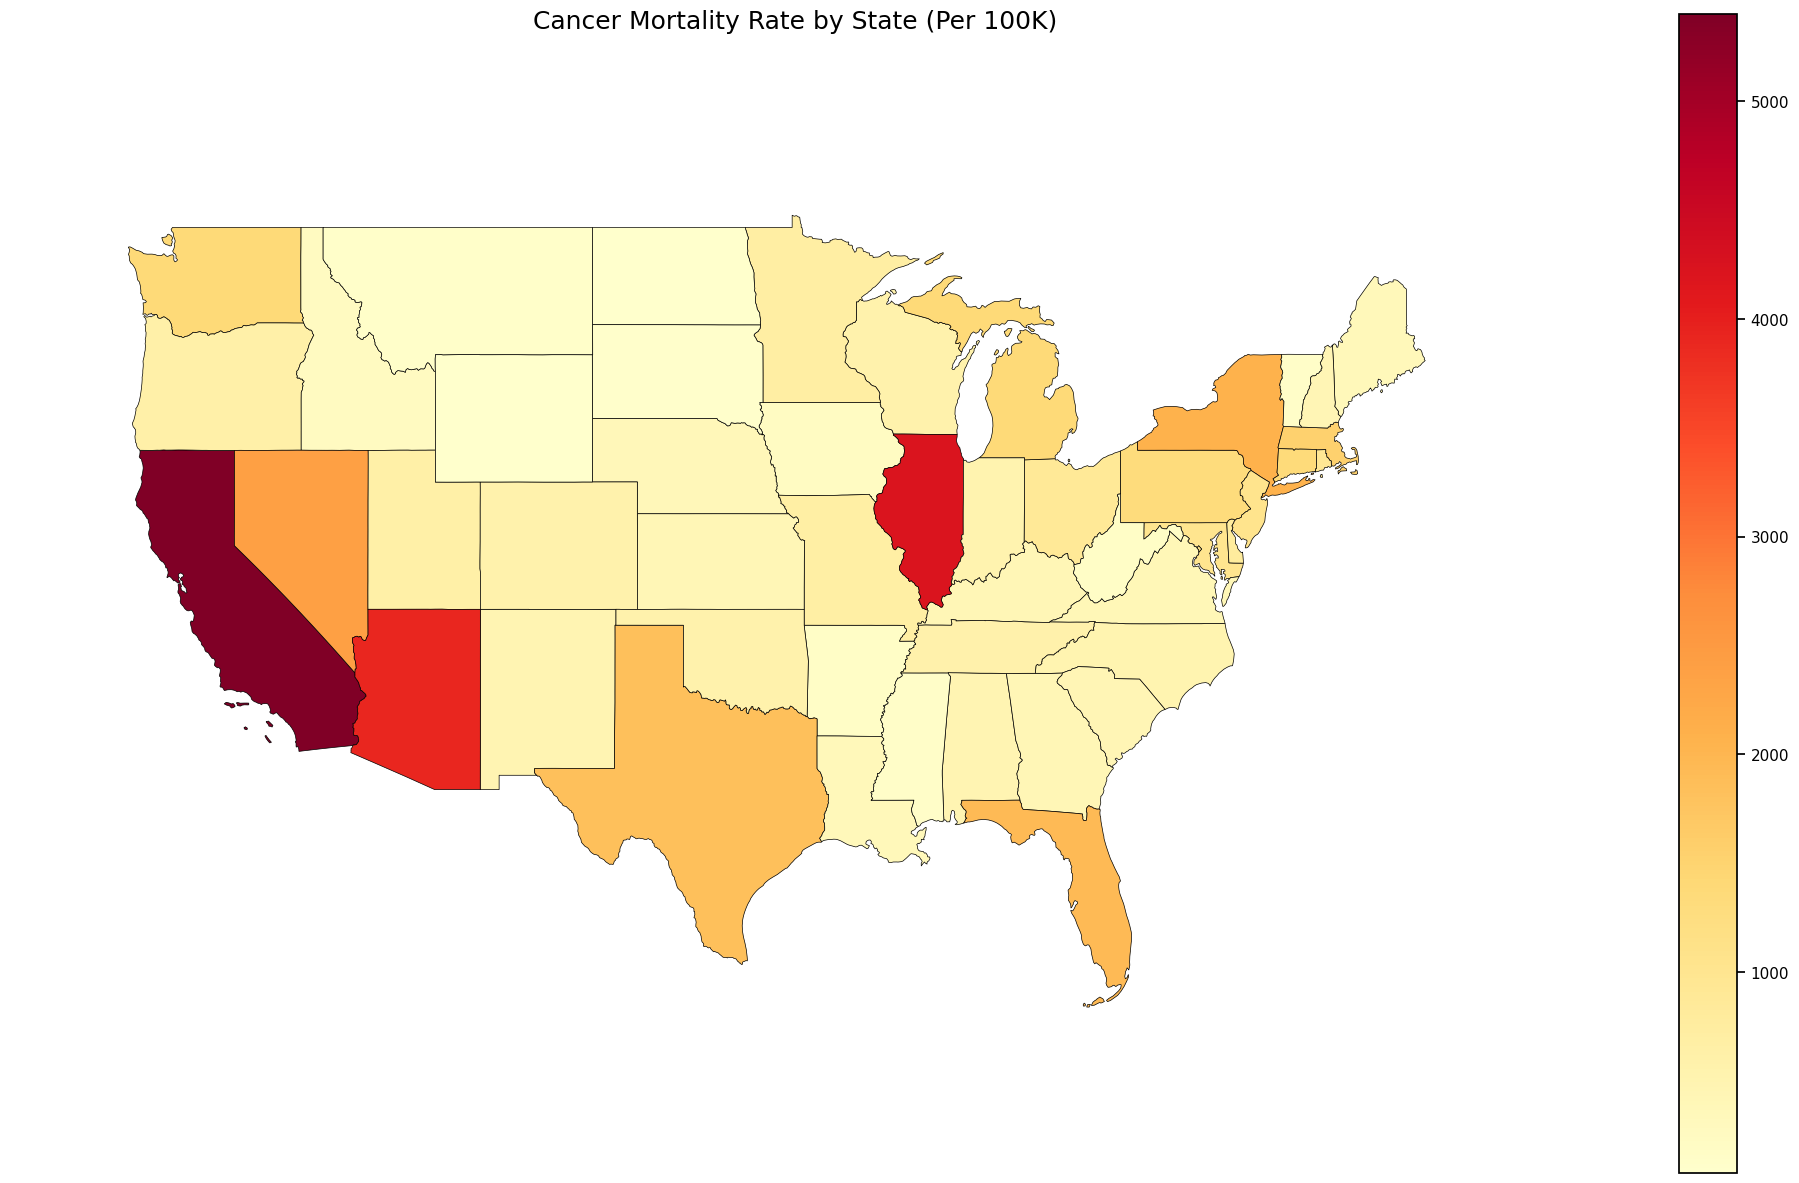

C:\Users\46262\AppData\Local\Temp\ipykernel_67368\978826002.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_states.values, y=top_states.index, palette='Reds_r')


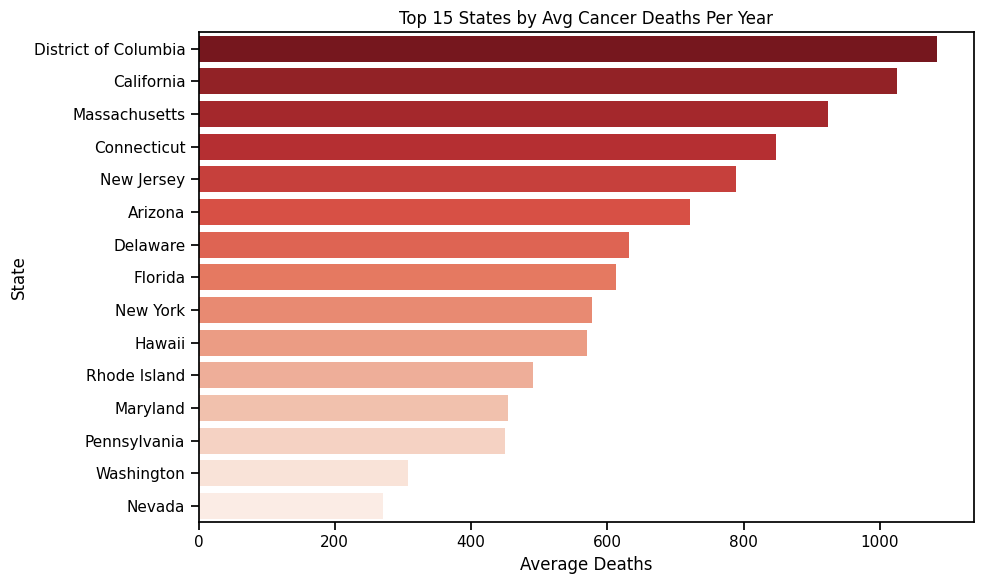

In [ ]:
# Load shapefile and merge
us_map = gpd.read_file("shapefile/cb_2018_us_state_20m.shp")
geo_merged = us_map.merge(state_df, left_on='NAME', right_on='state')

# Plot with adjusted zoom and aspect
fig, ax = plt.subplots(figsize=(20, 12))
geo_merged.plot(column='death_rate', cmap='YlOrRd', linewidth=0.5, edgecolor='black', legend=True, ax=ax)
ax.set_title("Cancer Mortality Rate by State (Per 100K)", fontsize=18)
ax.set_xlim(-130, -60)  # Zoom in horizontally
ax.set_ylim(20, 55)     # Zoom in vertically
ax.axis('off')
plt.tight_layout()
plt.savefig('../plots/Cancer Mortality Rate by State (Per 100K).png')
plt.show()

# Example fallback: Bar chart by state (top 15)
top_states = df.groupby('state')['avgdeathsperyear'].mean().sort_values(ascending=False).head(15)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_states.values, y=top_states.index, palette='Reds_r')
plt.title("Top 15 States by Avg Cancer Deaths Per Year")
plt.xlabel("Average Deaths")
plt.ylabel("State")
plt.tight_layout()
plt.savefig('../plots/Top 15 States by Avg Cancer Deaths Per Year')
plt.show()
